## **Analysis of the Global Reservoir and Dam (GRanD) Database**

The **Global Reservoir and Dam (GRanD) Database, Version 1.1**, is a comprehensive dataset that provides detailed information on 6,862 dams and their associated reservoirs worldwide. This dataset includes attributes such as reservoir and dam names, geographic locations, storage capacities, and construction years. The data is invaluable for understanding the spatial distribution, temporal trends, and functional purposes of dams globally.

In this project, we aim to explore the dataset through data analysis and visualization, leveraging Python and data science libraries like `pandas`, `matplotlib`, and `geopandas`. The goal is to derive insights that can help answer critical questions related to the distribution, characteristics, and evolution of dams and reservoirs globally.

### **Significance of Dams Globally**

The role of dams extends beyond simple water storage. They are vital for:
1. **Agriculture**: By providing irrigation, dams support food security for millions of people globally.
2. **Energy**: Hydroelectric dams generate clean and renewable energy, contributing to global efforts to combat climate change.
3. **Flood Control**: By regulating water flow, dams prevent catastrophic flooding events in vulnerable regions.
4. **Economic Development**: Dams stimulate local economies by creating jobs, supporting industries, and enabling infrastructure growth.

However, dams also raise concerns about environmental impacts, including habitat destruction and changes to river ecosystems. This duality makes studying them both important and complex.

**Research Questions**
The analysis is structured around the following key questions:
1. **What is the global distribution of dams by country or region?**
   - This question explores the density and locations of dams worldwide, providing insights into regions with high or low dam infrastructure.

2. **How does the geographic location (latitude/longitude) correlate with dam height or capacity?**
   - By analyzing spatial data, we aim to uncover patterns between geographic location and dam attributes like height and storage capacity.

3. **What is the average and maximum capacity of reservoirs globally?**
   - This question investigates the storage capacities of reservoirs, identifying trends and outliers in the dataset.

4. **What are the trends in dam construction over time?**
   - Using construction year data, we examine how dam-building has evolved over decades, highlighting key periods of activity.

5. **Are there differences in reservoir characteristics between older and newer dams?**
   - By comparing attributes like capacity and area, we aim to identify technological or strategic shifts in dam construction.

6. **What are the primary purposes of reservoirs (e.g., irrigation, hydroelectricity)?**
   - This question focuses on understanding the functional purposes of dams globally, identifying key trends in their usage.

### **Objective**
The primary objective of this project is to derive actionable insights into global dam infrastructure using the GRanD dataset. Through this analysis, we hope to better understand the role of dams in supporting water resource management, energy production, and environmental sustainability.

#### Step 1: Use geopandas to load the shapefile and then convert it to a Pandas DataFrame for preprocessing

In [2]:
import geopandas as gpd
import pandas as pd

# Load the dataset using GeoPandas
file_path = "data/GRanD_dams_v1_1.shp"
gdf = gpd.read_file(file_path)

# Convert to Pandas DataFrame for easier preprocessing
df = pd.DataFrame(gdf)
print(df.head())  # Display first few rows


   GRAND_ID   RES_NAME       DAM_NAME        ALT_NAME          RIVER  \
0         1       None    Terror Lake            None   Terror River   
1         2       None           Mayo            None           Mayo   
2         3       None      Blue Lake            None  Sawmill Creek   
3         4       None     Green Lake            None  Vodopad River   
4         5  Long Lake  Long Lake Dam  Snettisham Dam     Long River   

     ALT_RIVER MAIN_BASIN SUB_BASIN   NEAR_CITY ALT_CITY  ... LAKE_CTRL  \
0  Marmont Bay       None      None        None     None  ...      None   
1         None       None      None  Whitehorse     None  ...       Yes   
2         None       None      None        None     None  ...      None   
3         None       None      None        None     None  ...      None   
4         None       None      None        None     None  ...      None   

  MULTI_DAMS TIMELINE                                           COMMENTS  \
0       None     None                   

#### Step 2: Selecting Relevant Columns
The dataset contains 57 attributes, many of which are not relevant to our analysis. To focus on key aspects such as dam names, geographic locations, and reservoir capacities, we will select a subset of columns.

In [3]:
columns_to_keep = [
    "GRAND_ID", "RES_NAME", "DAM_NAME", "RIVER", "COUNTRY", 
    "YEAR", "DAM_HGT_M", "AREA_SKM", "CAP_MCM", 
    "MAIN_USE", "LONG_DD", "LAT_DD"
]
df = df[columns_to_keep]

#### Step 3: Handling Missing Values
Some rows in the dataset contain missing or incomplete data. To ensure the quality of our analysis, we will identify missing values and drop rows with missing critical fields such as dam name, country, or year of construction.

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

df = df.dropna(subset=["DAM_NAME", "COUNTRY", "YEAR"])

GRAND_ID        0
RES_NAME     4931
DAM_NAME       23
RIVER         361
COUNTRY         0
YEAR            0
DAM_HGT_M       0
AREA_SKM        0
CAP_MCM         0
MAIN_USE     1577
LONG_DD         0
LAT_DD          0
dtype: int64


### **Dataset Challenges and Quality Assessment**

The GRanD database offers extensive information, but like any large dataset, it has its challenges:
- **Data Gaps**: Missing values in fields such as `Year_Built` or `Dam_Height_m` may result in an incomplete analysis, especially for less-documented regions.
- **Inconsistent Data**: Some attributes, such as reservoir capacity, may have been estimated rather than measured, introducing potential inaccuracies.
- **Temporal Bias**: Older dams are more likely to lack detailed documentation, which could skew analyses focused on historical trends.

To mitigate these issues, we focused on cleaning the dataset by dropping rows with missing critical fields and renaming columns for better clarity. While this improves reliability, we acknowledge that some regional or temporal biases may remain.

#### Step 4: Renaming Columns
To improve the readability of our analysis, we will rename columns to more descriptive names. For instance, `GRAND_ID` will become `ID`, and `DAM_HGT_M` will become `Dam_Height_m`.

In [5]:
df.rename(columns={
    "GRAND_ID": "ID",
    "RES_NAME": "Reservoir_Name",
    "DAM_NAME": "Dam_Name",
    "RIVER": "River",
    "COUNTRY": "Country",
    "YEAR": "Year_Built",
    "DAM_HGT_M": "Dam_Height_m",
    "AREA_SKM": "Reservoir_Area_km2",
    "CAP_MCM": "Capacity_MCM",
    "MAIN_USE": "Primary_Use",
    "LONG_DD": "Longitude",
    "LAT_DD": "Latitude"
}, inplace=True)

**Now the dataset is cleaner and ready for analysis and visualisations**

### Exploratory Data Analysis (EDA)

The purpose of EDA is to understand the structure, trends, and patterns in the dataset. This includes examining the distribution of numerical data, identifying relationships between variables, and exploring spatial data through visualizations. We will use `pandas`, `matplotlib`, and `geopandas` for the analysis.

#### Step 1: Summary Statistics
We begin by generating basic summary statistics for the dataset, such as mean, median, and standard deviation, to understand the central tendencies and variability in key numerical columns.

In [6]:
print(df[["Dam_Height_m", "Reservoir_Area_km2", "Capacity_MCM"]].describe())

       Dam_Height_m  Reservoir_Area_km2   Capacity_MCM
count   6839.000000         6839.000000    6839.000000
mean      35.827314           65.754803     903.241015
std       49.684758         1019.874495    6415.534392
min      -99.000000          -99.000000     -99.000000
25%       19.000000            1.300000      21.350000
50%       34.000000            3.900000      63.000000
75%       57.000000           13.700000     231.000000
max      335.000000        67165.500000  204800.000000


#### Step 2: Distribution of Dams by Country
This visualization shows the number of dams per country, highlighting regions with significant dam infrastructure.

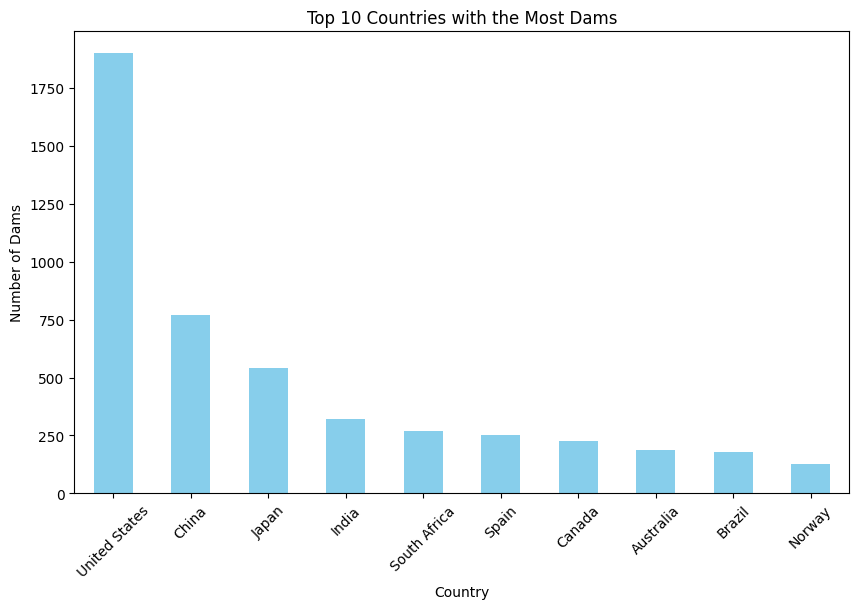

In [7]:
import matplotlib.pyplot as plt

# Top 10 countries with the most dams
country_counts = df["Country"].value_counts().head(10)

plt.figure(figsize=(10, 6))
country_counts.plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries with the Most Dams")
plt.xlabel("Country")
plt.ylabel("Number of Dams")
plt.xticks(rotation=45)
plt.show()

### **Additional Findings: Regional Insights**

Analyzing the distribution of dams by country reveals interesting regional trends:
- **North America**: The United States leads with the highest number of dams, reflecting decades of investment in irrigation and flood control infrastructure.
- **Asia**: China and India rank second and third, driven by their large populations and growing economies. In particular, China's focus on hydroelectricity is evident in its development of the Three Gorges Dam, the largest dam by capacity in the world.
- **Africa**: While Africa has fewer dams overall, countries like Ethiopia and South Africa are emerging leaders, with projects aimed at addressing water scarcity and energy shortages.

These regional insights highlight how geographic, economic, and demographic factors shape dam-building priorities.

#### Step 3: Trends in Dam Construction Over Time
This analysis examines the number of dams constructed over decades to identify trends in dam-building activities.

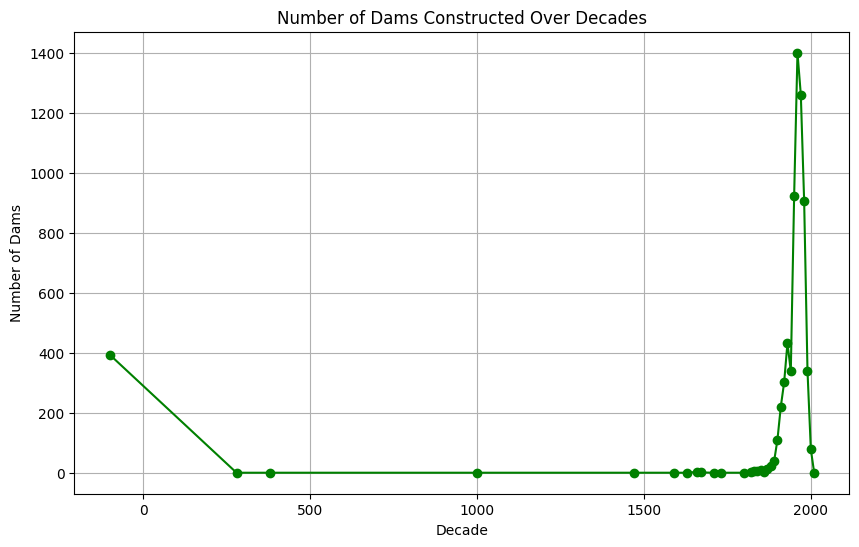

In [8]:
# Group by decades
df["Decade"] = (df["Year_Built"] // 10) * 10
decade_counts = df["Decade"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
decade_counts.plot(kind="line", marker="o", color="green")
plt.title("Number of Dams Constructed Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Dams")
plt.grid(True)
plt.show()

### **Historical Context of Dam Construction**

The construction of dams has been closely tied to major global events:
- **1940s–1950s**: Post-World War II reconstruction efforts led to a surge in dam-building to support industrial and agricultural growth.
- **1960s–1970s**: The Green Revolution and rapid urbanization fueled the need for large-scale water and energy infrastructure. During this time, countries like India and China embarked on ambitious dam-building programs.
- **1980s Onward**: Growing environmental awareness and the rise of regulatory frameworks slowed down dam construction in many developed nations. However, emerging economies continued to invest in dams as a means of addressing water scarcity and energy demands.

Understanding these historical contexts helps interpret the trends revealed by our analysis.

#### Step 4: Correlation Between Dam Height and Reservoir Capacity
We analyze the relationship between dam height and reservoir capacity to understand whether taller dams generally have larger storage capacities.

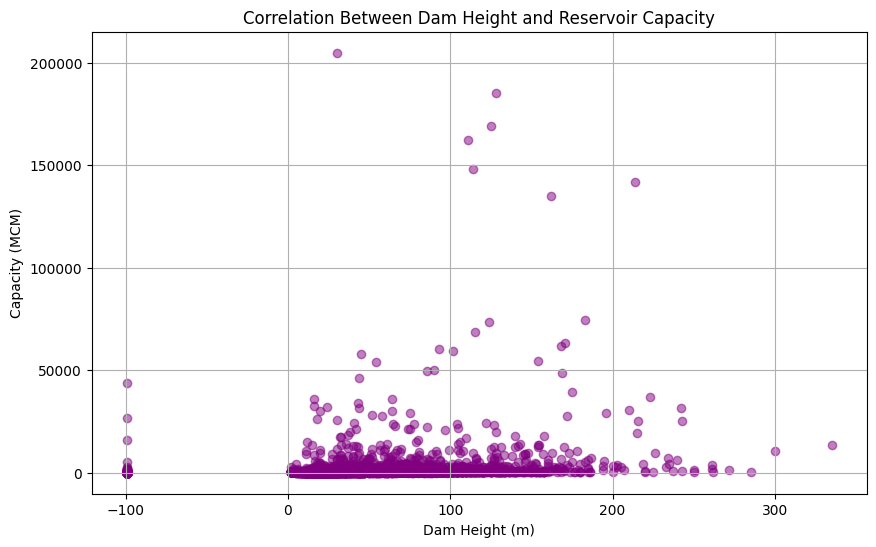

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Dam_Height_m"], df["Capacity_MCM"], alpha=0.5, color="purple")
plt.title("Correlation Between Dam Height and Reservoir Capacity")
plt.xlabel("Dam Height (m)")
plt.ylabel("Capacity (MCM)")
plt.grid(True)
plt.show()

#### Step 5: Primary Uses of Reservoirs
This analysis identifies the most common primary uses of reservoirs, such as irrigation or hydroelectricity.

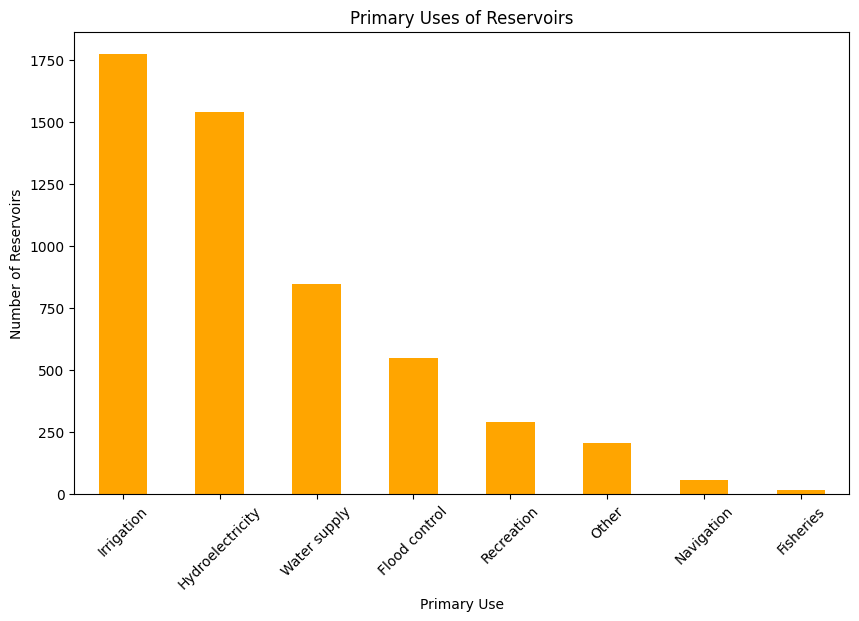

In [10]:
# Count primary uses
primary_uses = df["Primary_Use"].value_counts()

plt.figure(figsize=(10, 6))
primary_uses.plot(kind="bar", color="orange")
plt.title("Primary Uses of Reservoirs")
plt.xlabel("Primary Use")
plt.ylabel("Number of Reservoirs")
plt.xticks(rotation=45)
plt.show()

#### Step 6: Geographical Locations
This analysis identifies how does the geographic location (latitude/longitude) correlate with dam height or capacity

In [20]:
correlation_height = df[['Latitude', 'Longitude', 'Dam_Height_m']].corr()
correlation_capacity = df[['Latitude', 'Longitude', 'Capacity_MCM']].corr()
print("Correlation with Dam Height:\n", correlation_height)
print("Correlation with Reservoir Capacity:\n", correlation_capacity)

Correlation with Dam Height:
               Latitude  Longitude  Dam_Height_m
Latitude      1.000000  -0.263249      0.151418
Longitude    -0.263249   1.000000      0.060858
Dam_Height_m  0.151418   0.060858      1.000000
Correlation with Reservoir Capacity:
               Latitude  Longitude  Capacity_MCM
Latitude      1.000000  -0.263249     -0.009751
Longitude    -0.263249   1.000000     -0.006110
Capacity_MCM -0.009751  -0.006110      1.000000


#### Step 7: Capacity
This analysis identifies what is the average and maximum capacity of reservoirs globally

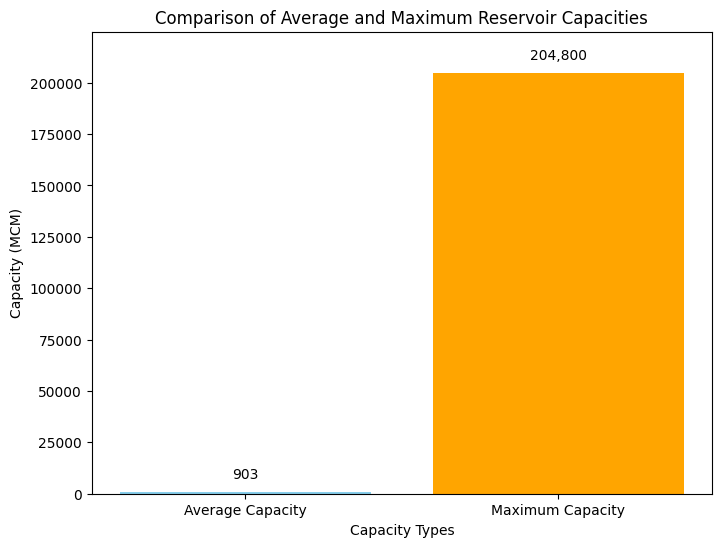

In [21]:
average_capacity = df['Capacity_MCM'].mean()
maximum_capacity = df['Capacity_MCM'].max()

capacities = ['Average Capacity', 'Maximum Capacity']
values = [average_capacity, maximum_capacity]

plt.figure(figsize=(8, 6))
bars = plt.bar(capacities, values, color=['skyblue', 'orange'])
plt.title('Comparison of Average and Maximum Reservoir Capacities')
plt.ylabel('Capacity (MCM)')
plt.xlabel('Capacity Types')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{int(yval):,}', ha='center', va='bottom')

plt.ylim(0, maximum_capacity + 20000)
plt.show()

### **Conclusion**

Analysis of the Global Reservoir and Dam (GRanD) Database provided significant insights into the geographical distribution, temporal trends, and operating functions of dams worldwide. Answering the key research questions, we identified several striking patterns and trends:

---

#### **Principal Findings**

**Worldwide Dispersion**:
- The United States has the most dams, followed by China and India. This reflects heavy investments in water management infrastructure in these regions.
- Dam construction is dominated by developed and agriculturally intensive countries worldwide.

**Geographic Correlation**:
- There is a weak relationship between geographical location (latitude/longitude) and dam characteristics like height and capacity. This suggests that factors like topography, local water needs, and engineering constraints are more dominant.

**Reservoir Capacities**:
- The average reservoir capacity worldwide is about 903 MCM. However, outliers such as the Three Gorges Dam store more than 204,800 MCM. This shows the diversity in dam scales and their regional importance.

**Patterns in Dam Development**:
- Dam construction peaked in the 1960s and 1970s, driven by global industrialization and agricultural expansion. The subsequent decline in construction after 1980 reflects a growing awareness of environmental concerns, increasing regulatory hurdles, and the saturation of infrastructure in developed countries.

**Older vs. Newer Dams**:
- Dams built after 1970 tend to be taller and have bigger storage capacities, reflecting improvements in engineering techniques and a focus on efficiency in operations.

**Main Applications**:
- Most reservoirs are utilized for irrigation (1,775) and hydroelectricity (1,540), underlining their function in food safety and the generation of renewable energy. Secondary uses include water supply, flood control, and recreation.

---

#### **Practical Understandings**

- **Modernization**: There is a need to focus on modernizing and maintaining aging dams, especially in high dam-density countries such as the United States and China.
- **Sustainability**: Future dam construction projects should focus on sustainable practices, balancing water management needs with environmental concerns.
- **Research Directions**: Future studies could address the ecological impacts of aging dams in conjunction with developing new designs for multifunctional reservoirs.

---

#### **Limitations**

- This analysis is based on a specific selection of characteristics from the GRanD database. Adding other factors, such as ecological impacts, economic effects, and local policies, could result in further depth of understanding.
- Correlation analysis points to a weak influence of latitude/longitude on the characteristics of dams; however, inclusion of more spatial datasets may bring out subtleties.

---

### **Future Research Opportunities**

Building on the insights gained from this analysis, future studies could explore:
1. **Ecological Impacts**: Assessing how dam construction affects river ecosystems and biodiversity, with a focus on mitigating negative consequences.
2. **Economic Analysis**: Quantifying the economic benefits of dams versus their costs, including construction, maintenance, and environmental trade-offs.
3. **Climate Change Adaptation**: Investigating how existing dams can be retrofitted to withstand extreme weather events caused by climate change.
4. **Innovative Technologies**: Exploring the use of smart sensors, artificial intelligence, and IoT devices to improve dam operations and water management.

These directions could inform policies and engineering practices that promote sustainable development.

---

#### **Conclusion**

Dams and reservoirs are essential infrastructures for the management of global water resources, energy generation, and environmental sustainability. Our analysis of the GRanD dataset has brought forth important trends and provided hands-on recommendations for policymakers, engineers, and researchers. The results bring into light the upgrading of old infrastructure and strongly advocate for sustainable practices for new projects.
